# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=",", quotechar='"')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(df.head(10))

                                              title       Marca  Preco_Normal  \
0              Pack 12 un, Leche extra proteína 1 L  Loncoleche         19788   
1   Pack 12 un, Leche chocolate receta original 1 L     Soprole         18228   
2    Pack 12 un, Leche semidescremada chocolate 1 L     Soprole         18228   
3     Pack 12 un, Leche semidescremada frutilla 1 L     Soprole         18228   
4       Pack 12 un, Leche sin lactosa chocolate 1 L  Loncoleche         17988   
5        Pack 12 un, Leche sin lactosa frutilla 1 L  Loncoleche         17988   
6  Pack 12 un, Leche saborizada light chocolate 1 L  Loncoleche         17988   
7         Pack 12 un, Leche saborizada frutilla 1 L       Colun         17388   
8         Pack 12 un, Leche saborizada vainilla 1 L       Colun         17388   
9           Pack 12 un, Leche saborizada manjar 1 L       Colun         17388   

   Preco_Desconto  Preco_Anterior  Desconto Categoria  
0               0               0         0   lacteo

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
df['Categoria_upper'] = df['Categoria'].str.upper()

preco_por_categoria = df.groupby('Categoria_upper')['Preco_Normal'].agg(
    media='mean',
    mediana='median'
).reset_index()

print(preco_por_categoria)

              Categoria_upper        media  mediana
0  BELLEZA-Y-CUIDADO-PERSONAL  1783.556485   1569.0
1          COMIDAS-PREPARADAS  3095.043478   3290.0
2                  CONGELADOS  2108.042553   1519.0
3                      FRUTAS  1724.473684   1195.0
4        INSTANTANEOS-Y-SOPAS   765.491228    439.0
5                     LACTEOS  2385.219239    989.0
6                    VERDURAS  1343.296875   1180.0


# comidas-preparadas está com a média abaixo da mediana, o restante estão todas acima.

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [4]:
desvio = df.groupby('Categoria')['Preco_Normal'].agg(
    desvio_padrao='std'
).reset_index()

print(desvio)

                    Categoria  desvio_padrao
0  belleza-y-cuidado-personal    2210.041719
1          comidas-preparadas    2019.911428
2                  congelados    2111.539896
3                      frutas    1639.151114
4        instantaneos-y-sopas    1170.232869
5                     lacteos    3925.816164
6                    verduras    1012.699625


# As categorias com maior desvio padrão, como lácteos, congelados e beleza e cuidados pessoais, têm média maior que a mediana, o que indica que há produtos muito caros puxando a média para cima (outliers).

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

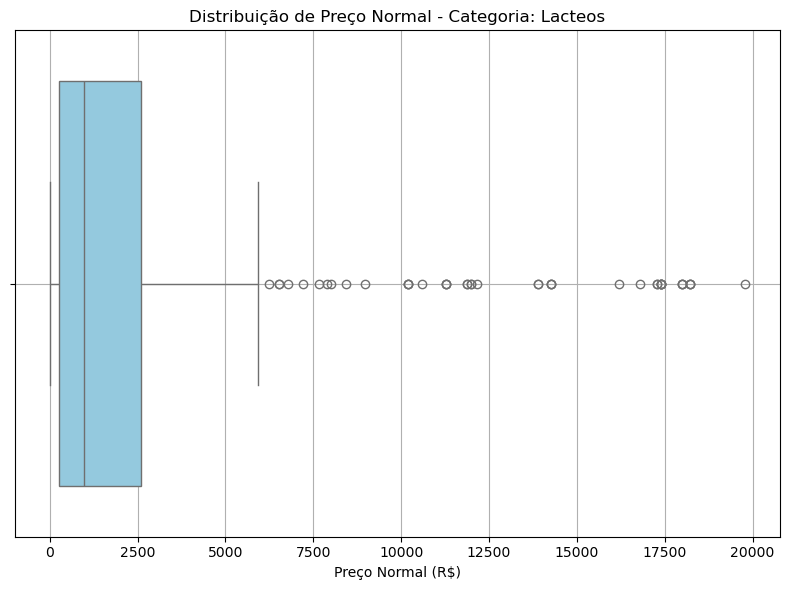

In [8]:
lacteos_df = df[df['Categoria'] == 'lacteos']

plt.figure(figsize=(8, 6))
sns.boxplot(data=lacteos_df, x='Preco_Normal', color='skyblue')
plt.title('Distribuição de Preço Normal - Categoria: Lacteos')
plt.xlabel('Preço Normal (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

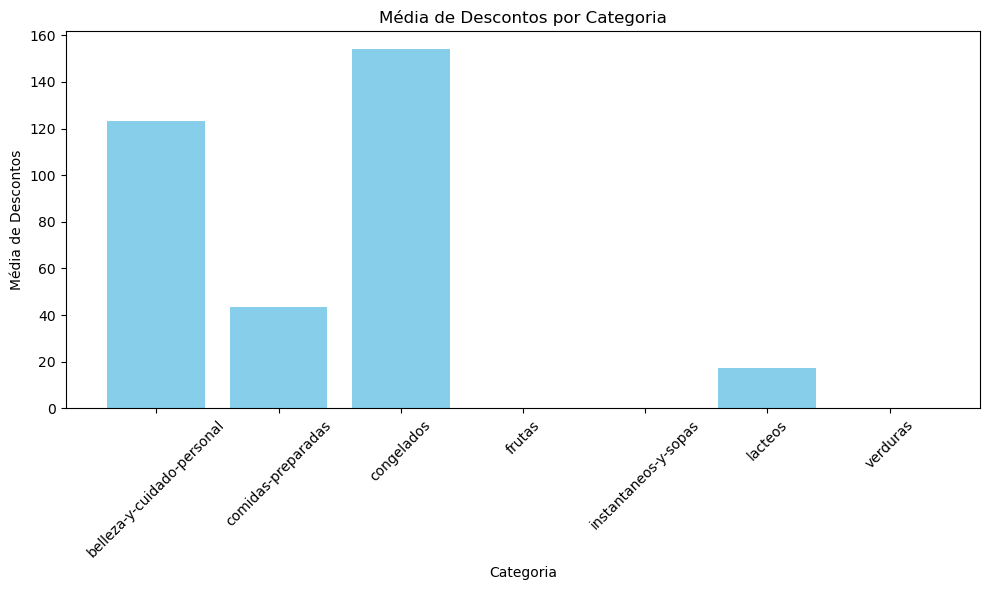

In [9]:
media_descontos = df.groupby('Categoria')['Desconto'].mean().reset_index()

# Passo 3: plotar gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(media_descontos['Categoria'], media_descontos['Desconto'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Média de Descontos')
plt.title('Média de Descontos por Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

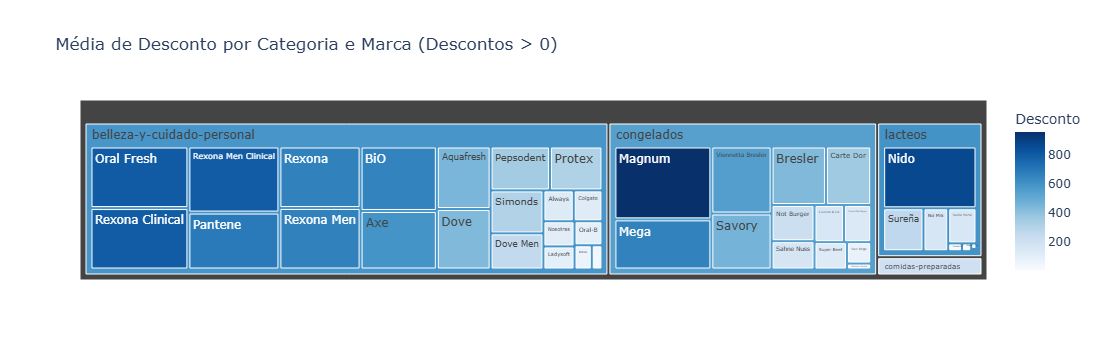

In [14]:
df_grouped = df_grouped[df_grouped['Desconto'] > 0]

fig = px.treemap(
    df_grouped,
    path=['Categoria', 'Marca'],
    values='Desconto',
    color='Desconto',
    color_continuous_scale='Blues',
    title='Média de Desconto por Categoria e Marca (Descontos > 0)'
)

fig.show()

